In [3]:
import tensorflow as tf
from tensorflow.keras import datasets
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print(X_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential([
  Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
  MaxPooling2D((2,2)),
  Conv2D(64, (3,3), activation='relu'),
  MaxPooling2D((2,2)),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, epochs=5, validation_split=0.2)
model.evaluate(X_test, y_test)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 46ms/step - accuracy: 0.3821 - loss: 1.6961 - val_accuracy: 0.5661 - val_loss: 1.2347
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - accuracy: 0.5951 - loss: 1.1355 - val_accuracy: 0.6339 - val_loss: 1.0570
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 63s 50ms/step - accuracy: 0.6639 - loss: 0.9627 - val_accuracy: 0.6612 - val_loss: 0.9864
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.7022 - loss: 0.8590 - val_accuracy: 0.6574 - val_loss: 0.9877
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 59s 47ms/step - accuracy: 0.7302 - loss: 0.7738 - val_accuracy: 0.6801 - val_loss: 0.9396
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6865 - loss: 0.9289


[0.937207043170929, 0.6855000257492065]

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 68.55%


In [10]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


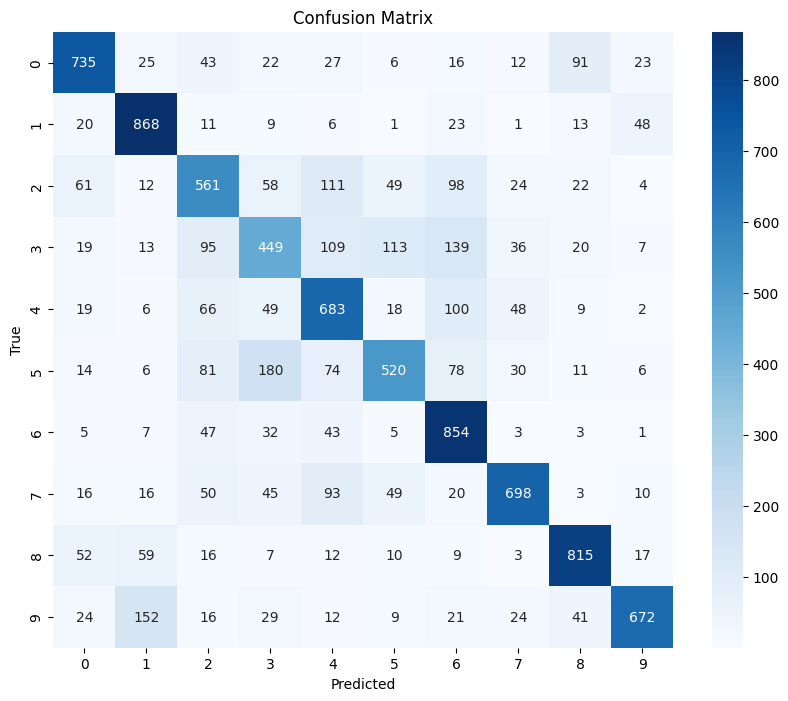

In [11]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [12]:
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1000
           1       0.75      0.87      0.80      1000
           2       0.57      0.56      0.56      1000
           3       0.51      0.45      0.48      1000
           4       0.58      0.68      0.63      1000
           5       0.67      0.52      0.58      1000
           6       0.63      0.85      0.72      1000
           7       0.79      0.70      0.74      1000
           8       0.79      0.81      0.80      1000
           9       0.85      0.67      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000



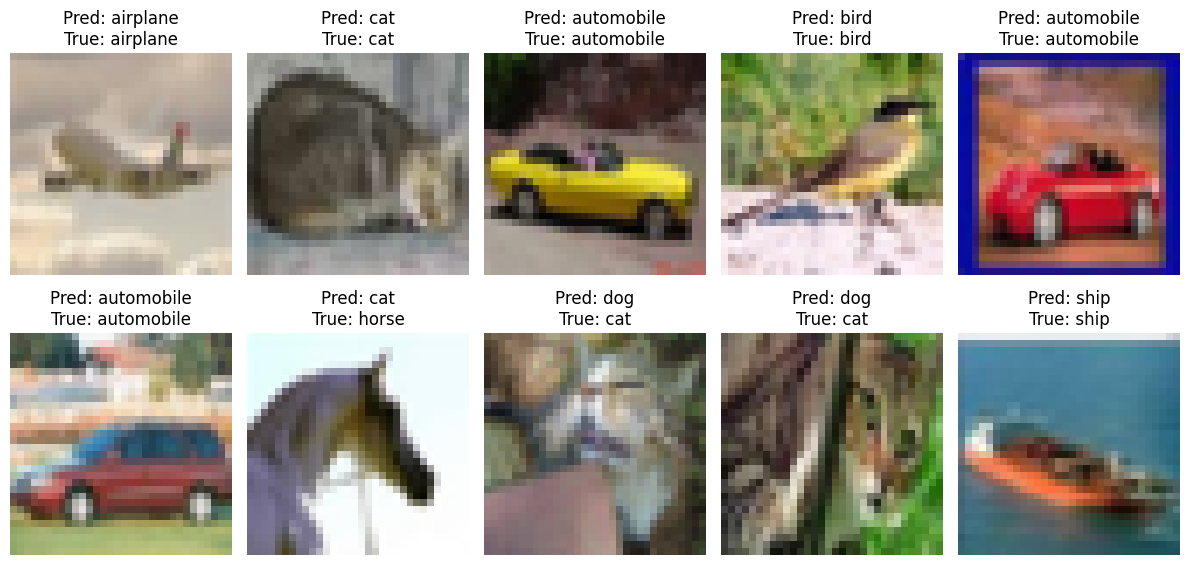

In [13]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(12,6))
for i in range(10):
    index = np.random.randint(0, len(X_test))
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[index])
    plt.title(f"Pred: {class_names[y_pred_classes[index]]}\nTrue: {class_names[y_true[index]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Saving be6e to be6e (1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


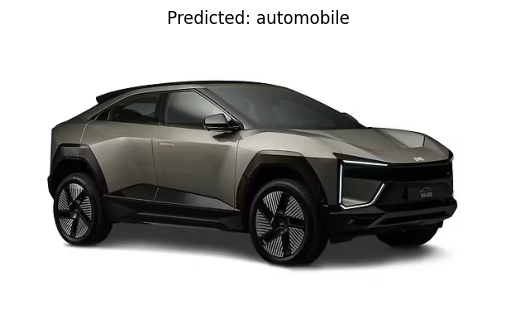

In [16]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Upload an image
uploaded = files.upload()

for file_name in uploaded.keys():
    img_path = file_name

    # Load and preprocess image
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.0

    # Predict
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

    # Show image and prediction
    plt.imshow(image.load_img(img_path))
    plt.axis('off')
    plt.title(f"Predicted: {class_names[predicted_class]}")
    plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.8965 - loss: 0.3309 - val_accuracy: 0.9797 - val_loss: 0.0640
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9829 - loss: 0.0539 - val_accuracy: 0.9845 - val_loss: 0.0507
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.9902 - loss: 0.0306 - val_accuracy: 0.9870 - val_loss: 0.0441
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9925 - loss: 0.0220 - val_accuracy: 0.9862 - val_loss: 0.0434
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9937 - loss: 0.0179 - val_accuracy: 0.9867 - val_loss: 0.0518
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9852 - loss: 0.0565

Test Accuracy: 0.9876
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2      

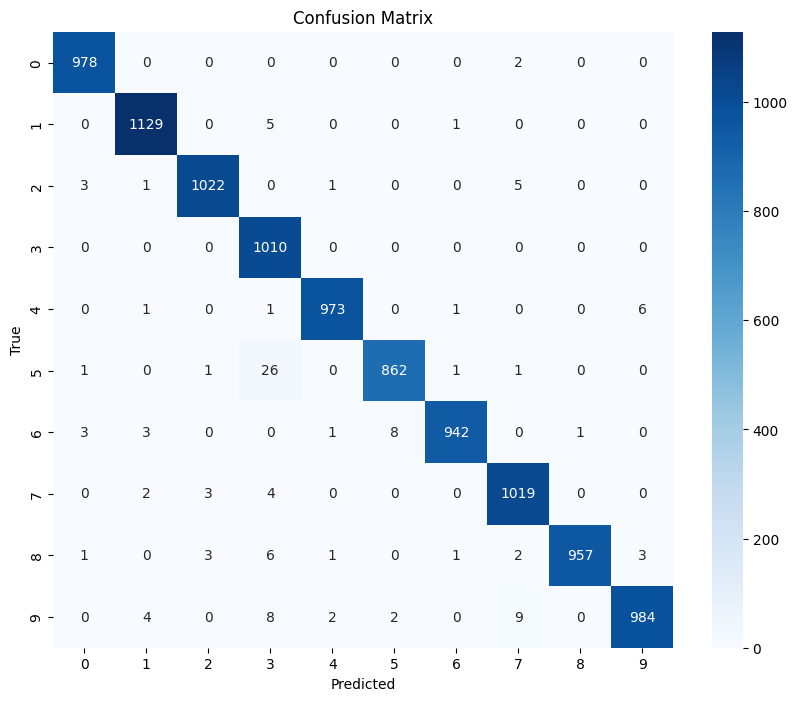

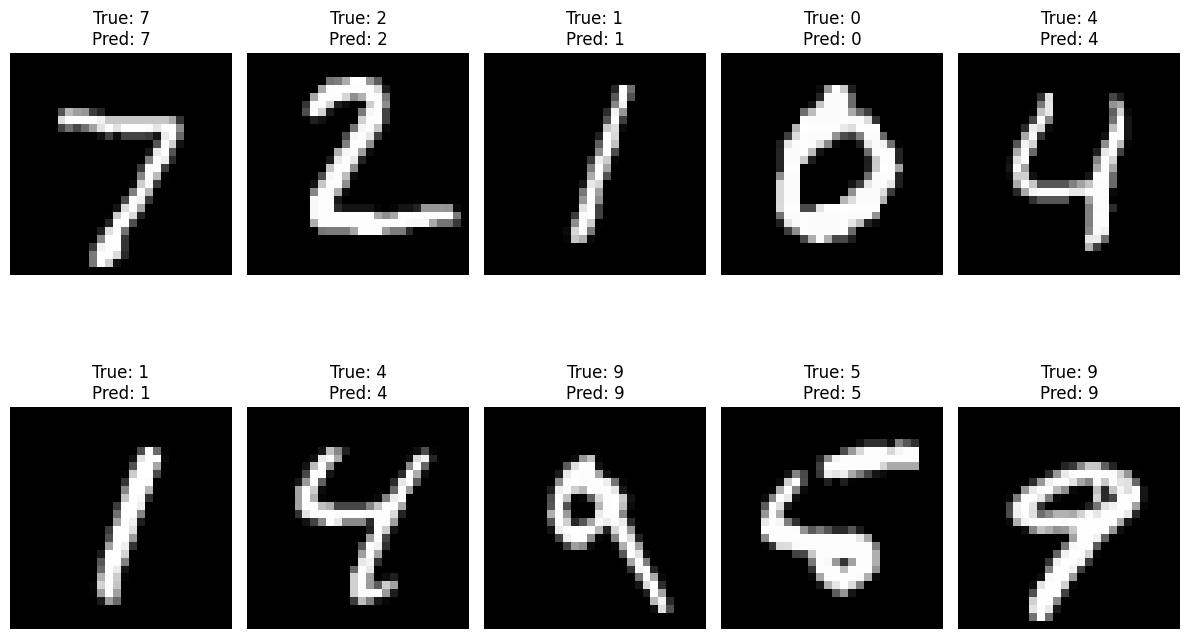

In [17]:
# Step 1: Import Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Step 2: Load MNIST Dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

# Reshape for CNN input: (samples, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

# Step 3: Build CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(X_train, y_train_cat, epochs=5, validation_split=0.2)

# Step 5: Evaluate on Test Set
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Step 6: Confusion Matrix and Classification Report
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes))

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Step 7: Display Sample Predictions
def plot_images(images, labels, predictions=None):
    plt.figure(figsize=(12, 8))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i].reshape(28,28), cmap='gray')
        true_label = labels[i]
        if predictions is None:
            plt.title(f"True: {true_label}")
        else:
            pred_label = predictions[i]
            plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_images(X_test, y_test, y_pred_classes)